In [1]:
##import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick  
import seaborn as sns 
import os
import sys


**Import the scrubbed customer churn data set created in the data wrangling notebook.**

In [2]:
churn_df = pd.read_csv('../data_files/interim/scrubbed_Telco_Customer_Churn.csv')

In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                7032 non-null   object 
 1   SeniorCitizen         7032 non-null   int64  
 2   Partner               7032 non-null   object 
 3   Dependents            7032 non-null   object 
 4   tenure                7032 non-null   int64  
 5   PhoneService          7032 non-null   object 
 6   MultipleLines         7032 non-null   object 
 7   InternetService       7032 non-null   object 
 8   OnlineSecurity        7032 non-null   object 
 9   OnlineBackup          7032 non-null   object 
 10  DeviceProtection      7032 non-null   object 
 11  TechSupport           7032 non-null   object 
 12  StreamingTV           7032 non-null   object 
 13  StreamingMovies       7032 non-null   object 
 14  Contract              7032 non-null   object 
 15  PaperlessBilling     

In [4]:
#change SeniorCitizen to object to match other categorical features
churn_df['SeniorCitizen'] = churn_df['SeniorCitizen'].map({0: 'No', 1:'Yes'}).astype('object')
# Get the data types of each column
column_data_types = churn_df.dtypes
#initiate variables with numeric vs non_numeric fields
numeric_features = column_data_types[column_data_types != 'object'].index.tolist()
non_numeric_features = column_data_types[column_data_types == 'object'].index.tolist()

In [5]:
print(non_numeric_features)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [6]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,0,0,1,1,0,0,0,0.0,2
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,0,0,0,0,1,1,1,1,1.0,4
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,0,0,0,1,1,1,0,1,1.0,4
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,1,0,0,0,1,1,1,2,0.0,4
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,0,0,0,1,2,0,0,0,1.0,3


In [7]:
churn_df.shape

(7032, 38)

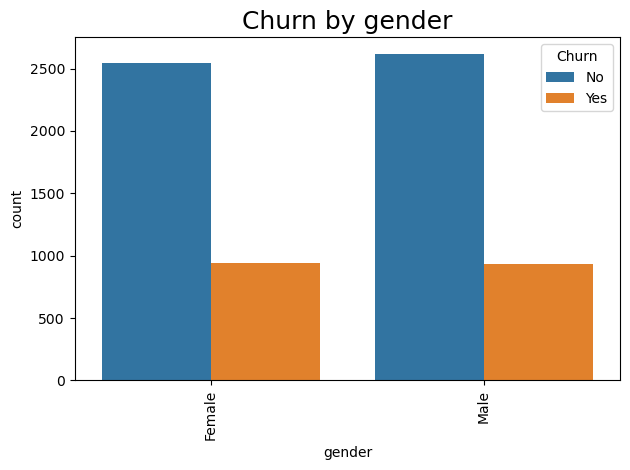

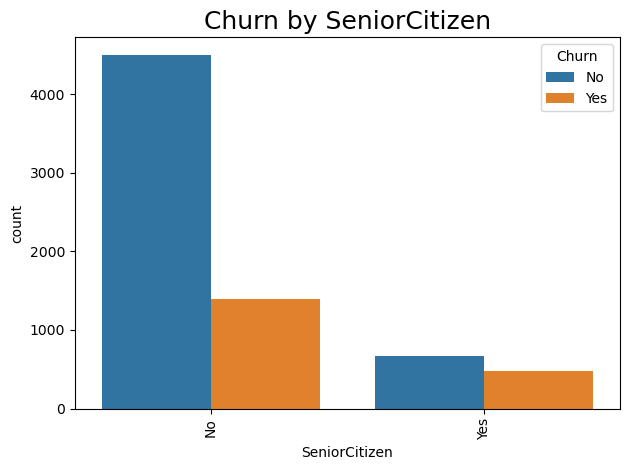

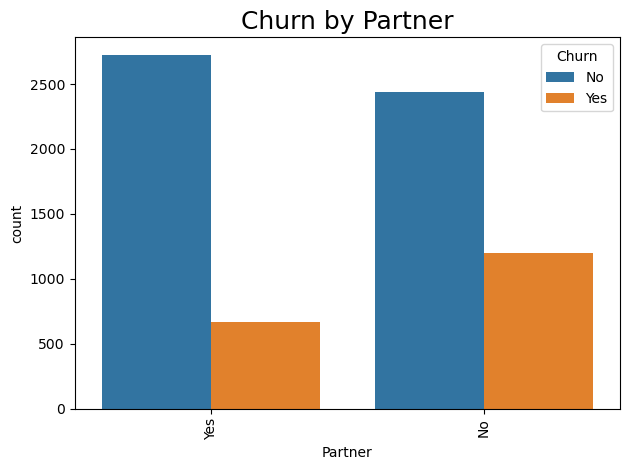

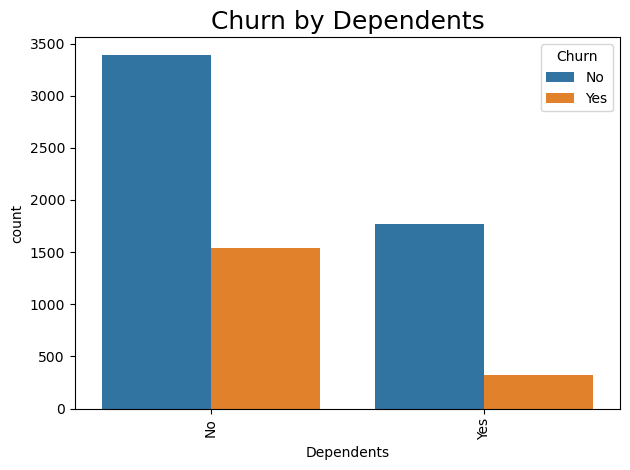

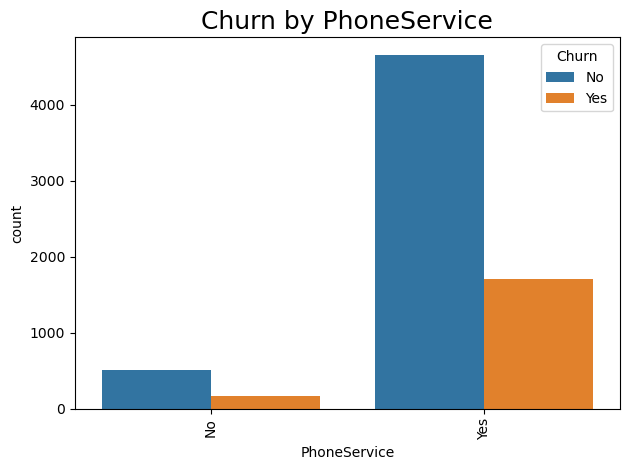

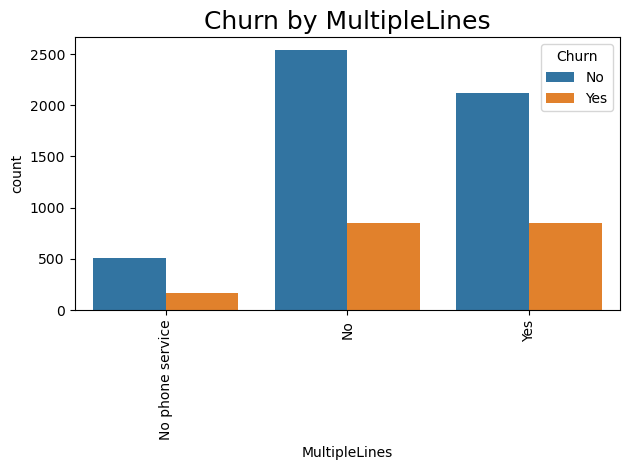

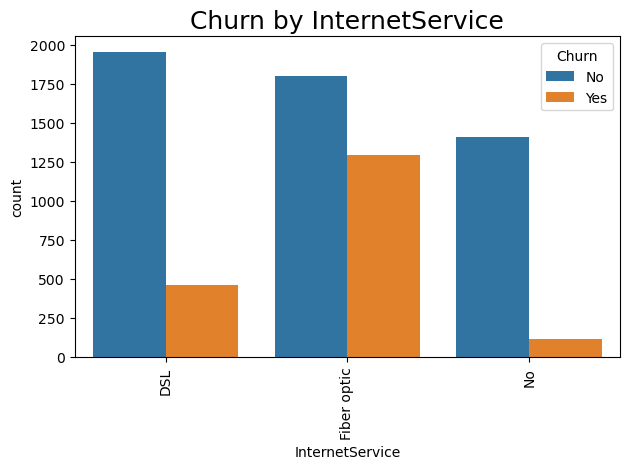

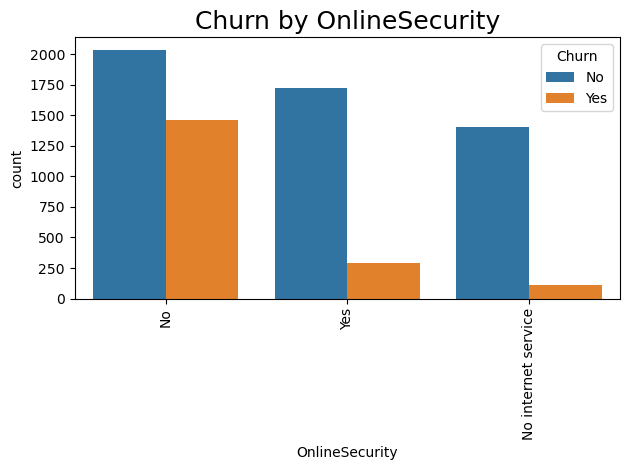

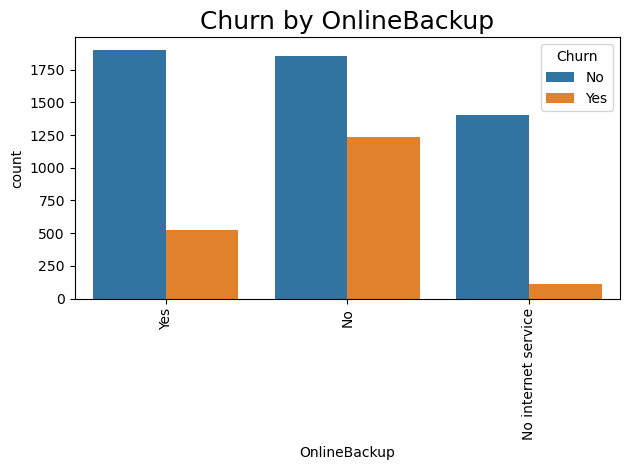

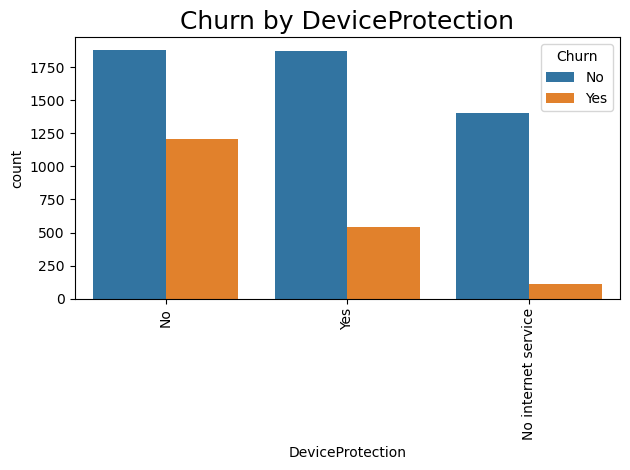

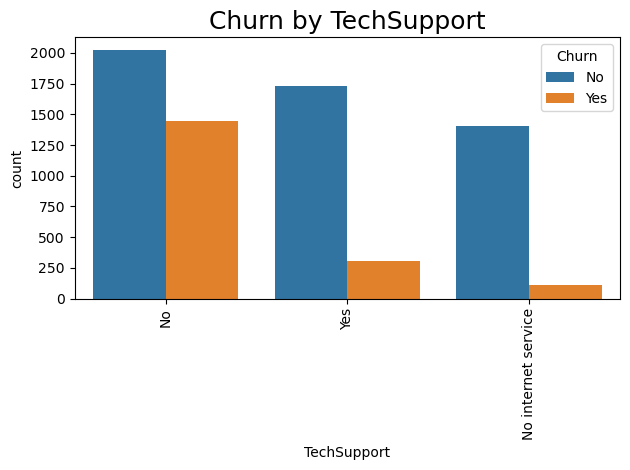

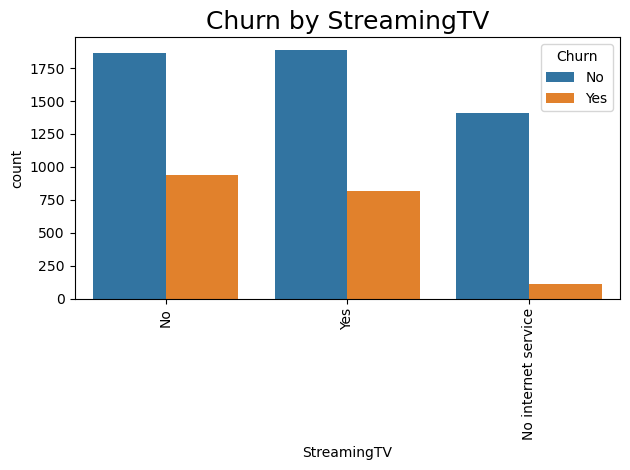

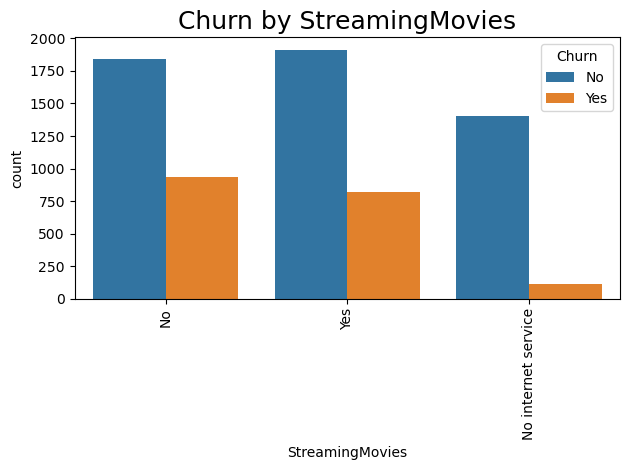

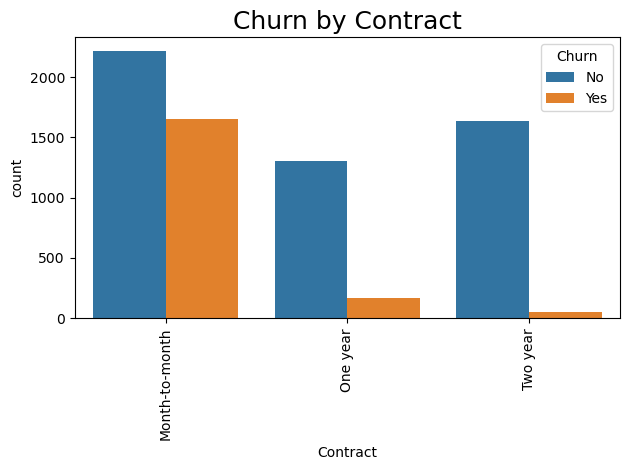

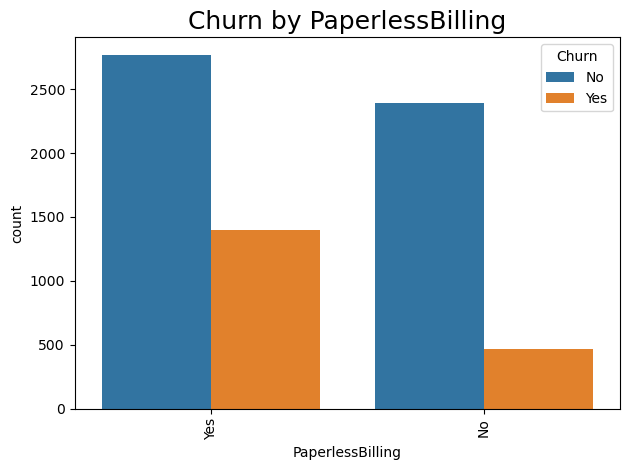

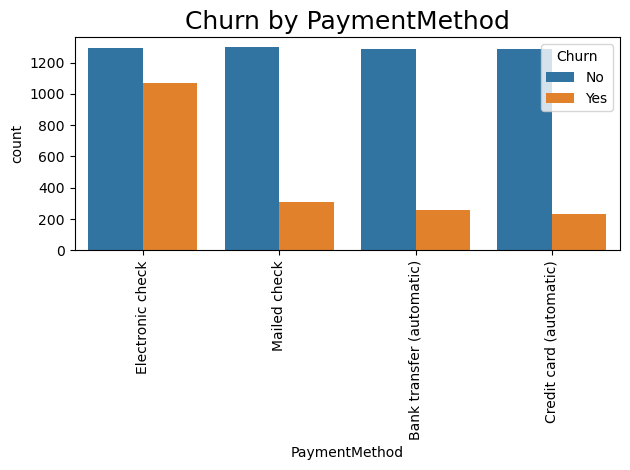

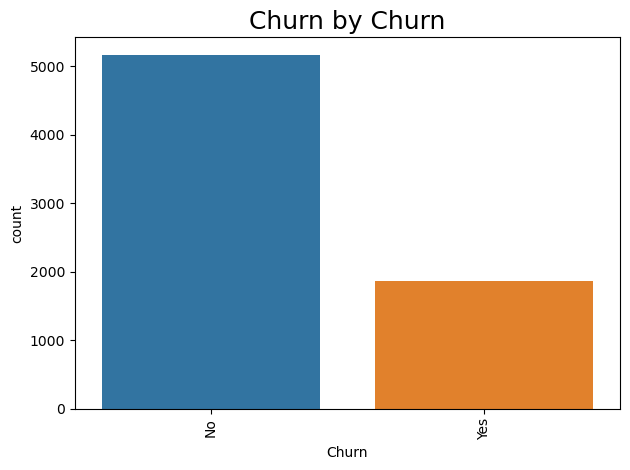

In [8]:
# As churn is the main variable under review, it would be best to plot all of the other categorical variables by churn vs active to see if that provides any insights
for i, cat_variable in enumerate(churn_df.drop(columns = numeric_features)):
    plt.figure(i)
    sns.countplot(data=churn_df, x=cat_variable, hue='Churn')
    plt.title(f'Churn by {cat_variable}', fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
  
    

# Initial Thoughts on dataset:
Additional variables that may impact the potential to churn for a customer.  
* Senior Citizens appear to be less likely to churn
* Single people appear to be more likely to churn
* Customers without children(dependents) appear to be more likely to churn
* Tenure is too messy to view.  Will need to group the monthly tenure into yearly tenure buckets to gain any insights
* Customers who have Fiber Optic internet service are more likely to churn than those who have DSL internet service or none at all.
* Churn appears to be higher for customers without the online security feature
* Churn appears to be higher for customers that do not have the onine back-up feature.
* Churn appears to be higher for customers without device protection service
* Churn also appears higher for customers that do not have tech support services
* Similarly, churn appears to be higher for customers that do not have TV or Movie steaming services as well.
* Monthly customers appear to churn at a much higher rate than those with 1 or 2 year contracts.  2 years contracts has the lowest churn rate.
* Customers appear more likely to churn if they are billed with the paperless service or if they pay by electronic check.

All of the categorical columns will need to be converted to numeric data prior to training ml models.
An additional column should be added to the dataset to count the number of services each customer is enrolled.  As that could potentially be related to churn.
We can then look at the correlation between churn and each of these features.

In [9]:
# create bins for tenure
bins = [0,12,24,36,48,60,72, float('inf')]
churn_df['tenureGroups'] = pd.cut(churn_df['tenure'], bins=bins, labels=['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72', '> 72'], right=False)

In [10]:
churn_df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services,tenureGroups
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,0,1,1,0,0,0,0.0,2,1 - 12
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,0,0,0,1,1,1,1,1.0,4,25 - 36
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,0,0,1,1,1,0,1,1.0,4,1 - 12
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,0,0,0,1,1,1,2,0.0,4,37 - 48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,0,0,1,2,0,0,0,1.0,3,1 - 12
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,...,1,1,1,2,0,0,0,1.0,7,1 - 12
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,1,0,1,2,1,0,3,1.0,6,13 - 24
7,Female,No,No,No,10,No,No phone service,DSL,Yes,No,...,0,0,0,1,0,0,1,0.0,2,1 - 12
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,1,1,1,2,0,0,0,1.0,8,25 - 36
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,...,0,0,0,1,1,1,2,1.0,4,61 - 72


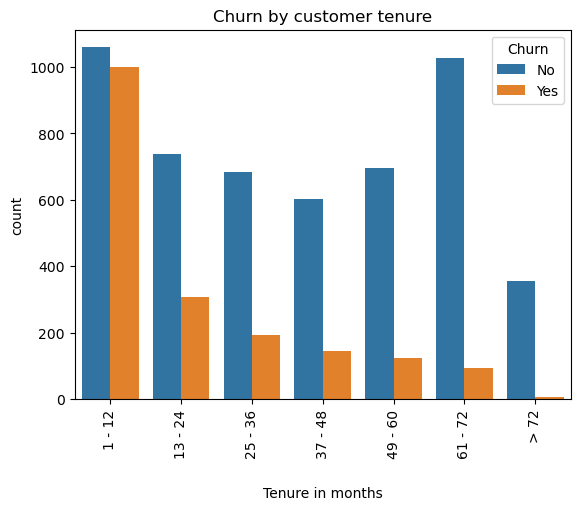

In [11]:
#plot tenureGroup vs churn 
plt.xlabel("Tenure in months", labelpad=20)
sns.countplot(data=churn_df, x ='tenureGroups', hue='Churn')
plt.title('Churn by customer tenure')
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

NOTE: Churn also appears to be highest among customers within their first year of service.

In [12]:
#list of columns
churn_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_num', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'MultipleLines_num',
       'OnlineSecurity_num', 'OnlineBackup_num', 'DeviceProtection_num',
       'TechSupport_num', 'StreamingTV_num', 'StreamingMovies_num',
       'PaperlessBilling_num', 'InternetService_num', 'gender_num',
       'Contract_num', 'PaymentMethod_num', 'Phone_Internet',
       'Number_of_Services', 'tenureGroups'],
      dtype='object')

In [13]:
#convert churn to binary numeric value with Yes=1 and No=0 to avoid it being impacted by get_dummies method for categorical object data
churn_df['Churn'] = np.where(churn_df.Churn =='Yes',1,0)
churn_df['Customer_Status'] = churn_df['Churn'].map({0: 'Active', 1: 'Churned'})

churn_df['Phone_Internet_bundle'] = churn_df['Phone_Internet'].map({0: 'No', 1:'Yes'})
#drop the formerly created numeric columns for churn counts
drop_columns = ['Churn_num', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'MultipleLines_num',
       'OnlineSecurity_num', 'OnlineBackup_num', 'DeviceProtection_num',
       'TechSupport_num', 'StreamingTV_num', 'StreamingMovies_num',
       'PaperlessBilling_num', 'InternetService_num', 'gender_num',
       'Contract_num', 'PaymentMethod_num', 'Phone_Internet']
churn_df_skinny = churn_df.drop(columns =drop_columns )
churn_df_skinny.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_of_Services,tenureGroups,Customer_Status,Phone_Internet_bundle
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,2,1 - 12,Active,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,0,4,25 - 36,Active,Yes
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,4,1 - 12,Churned,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,4,37 - 48,Active,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,3,1 - 12,Churned,Yes


In [14]:
#export post EDA churn_df for pre-processing. we are exporting now prior to using get_dummies without dropping the first category below for deriving correlations
#however, in our preprocessing steps, we will drop the first category in order to reduce the potential for perfect multicollinearity.
churn_df_skinny.to_csv('../data_files/interim/ready_for_preprocessing_Telco_Customer_Churn.csv', index=False)

In [15]:
#convert all the categorical variables into numeric values using pd.get_dummies method.
churn_converted = pd.get_dummies(churn_df_skinny, dtype=int)
churn_converted.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Number_of_Services,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,tenureGroups_13 - 24,tenureGroups_25 - 36,tenureGroups_37 - 48,tenureGroups_49 - 60,tenureGroups_61 - 72,tenureGroups_> 72,Customer_Status_Active,Customer_Status_Churned,Phone_Internet_bundle_No,Phone_Internet_bundle_Yes
0,1,29.85,29.85,0,2,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,4,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,1
2,2,53.85,108.15,1,4,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,1
3,45,42.30,1840.75,0,4,0,1,1,0,1,...,0,0,1,0,0,0,1,0,1,0
4,2,70.70,151.65,1,3,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1


In [16]:
churn_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 59 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int32  
 4   Number_of_Services                       7032 non-null   int64  
 5   gender_Female                            7032 non-null   int32  
 6   gender_Male                              7032 non-null   int32  
 7   SeniorCitizen_No                         7032 non-null   int32  
 8   SeniorCitizen_Yes                        7032 non-null   int32  
 9   Partner_No                               7032 non-null   int32  
 10  Partner_Yes                              7032 no

In [17]:
#review correlation of the various variables 
churn_converted.corr()

,tenure,MonthlyCharges,TotalCharges,Churn,Number_of_Services,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,tenureGroups_13 - 24,tenureGroups_25 - 36,tenureGroups_37 - 48,tenureGroups_49 - 60,tenureGroups_61 - 72,tenureGroups_> 72,Customer_Status_Active,Customer_Status_Churned,Phone_Internet_bundle_No,Phone_Internet_bundle_Yes
tenure,1.000000,0.246862,0.825880,-0.354049,0.433645,-0.005285,0.005285,-0.015683,0.015683,-0.381912,...,-0.260513,-0.047434,0.130113,0.311609,0.601187,0.375674,0.354049,-0.354049,-0.007877,0.007877
MonthlyCharges,0.246862,1.000000,0.651065,0.192858,0.925308,0.013779,-0.013779,-0.219874,0.219874,-0.097825,...,-0.054846,0.004133,0.018721,0.059623,0.137496,0.123109,-0.192858,0.192858,-0.248033,0.248033
TotalCharges,0.825880,0.651065,1.000000,-0.199484,0.775166,-0.000048,0.000048,-0.102411,0.102411,-0.319072,...,-0.228635,-0.061504,0.074729,0.232397,0.507891,0.362730,0.199484,-0.199484,-0.113008,0.113008
Churn,-0.354049,0.192858,-0.199484,1.000000,0.042047,0.008545,-0.008545,-0.150541,0.150541,0.149982,...,0.027783,-0.038825,-0.055138,-0.095228,-0.180230,-0.131426,-1.000000,1.000000,-0.011691,0.011691
Number_of_Services,0.433645,0.925308,0.775166,0.042047,1.000000,0.015827,-0.015827,-0.156681,0.156681,-0.178218,...,-0.093073,-0.002806,0.039179,0.099619,0.244450,0.218658,-0.042047,0.042047,-0.132372,0.132372
gender_Female,-0.005285,0.013779,-0.000048,0.008545,0.015827,1.000000,-1.000000,-0.001819,0.001819,-0.001379,...,0.011516,-0.015408,0.012464,0.014044,-0.015726,-0.002962,-0.008545,0.008545,-0.007515,0.007515
gender_Male,0.005285,-0.013779,0.000048,-0.008545,-0.015827,-1.000000,1.000000,0.001819,-0.001819,0.001379,...,-0.011516,0.015408,-0.012464,-0.014044,0.015726,0.002962,0.008545,-0.008545,0.007515,-0.007515
SeniorCitizen_No,-0.015683,-0.219874,-0.102411,-0.150541,-0.156681,-0.001819,0.001819,1.000000,-1.000000,0.016957,...,0.007618,-0.028883,-0.001906,-0.007006,-0.003106,0.004866,0.150541,-0.150541,0.008392,-0.008392
SeniorCitizen_Yes,0.015683,0.219874,0.102411,0.150541,0.156681,0.001819,-0.001819,-1.000000,1.000000,-0.016957,...,-0.007618,0.028883,0.001906,0.007006,0.003106,-0.004866,-0.150541,0.150541,-0.008392,0.008392
Partner_No,-0.381912,-0.097825,-0.319072,0.149982,-0.178218,-0.001379,0.001379,0.016957,-0.016957,1.000000,...,0.064105,-0.004587,-0.030538,-0.098727,-0.211546,-0.175580,-0.149982,0.149982,0.018397,-0.018397


In [18]:
# some columns for example (Customer Status) should be removed as it is merely a label for churn
churn_converted_filtered = churn_converted.drop(columns=['Customer_Status_Active', 'Customer_Status_Churned' ])

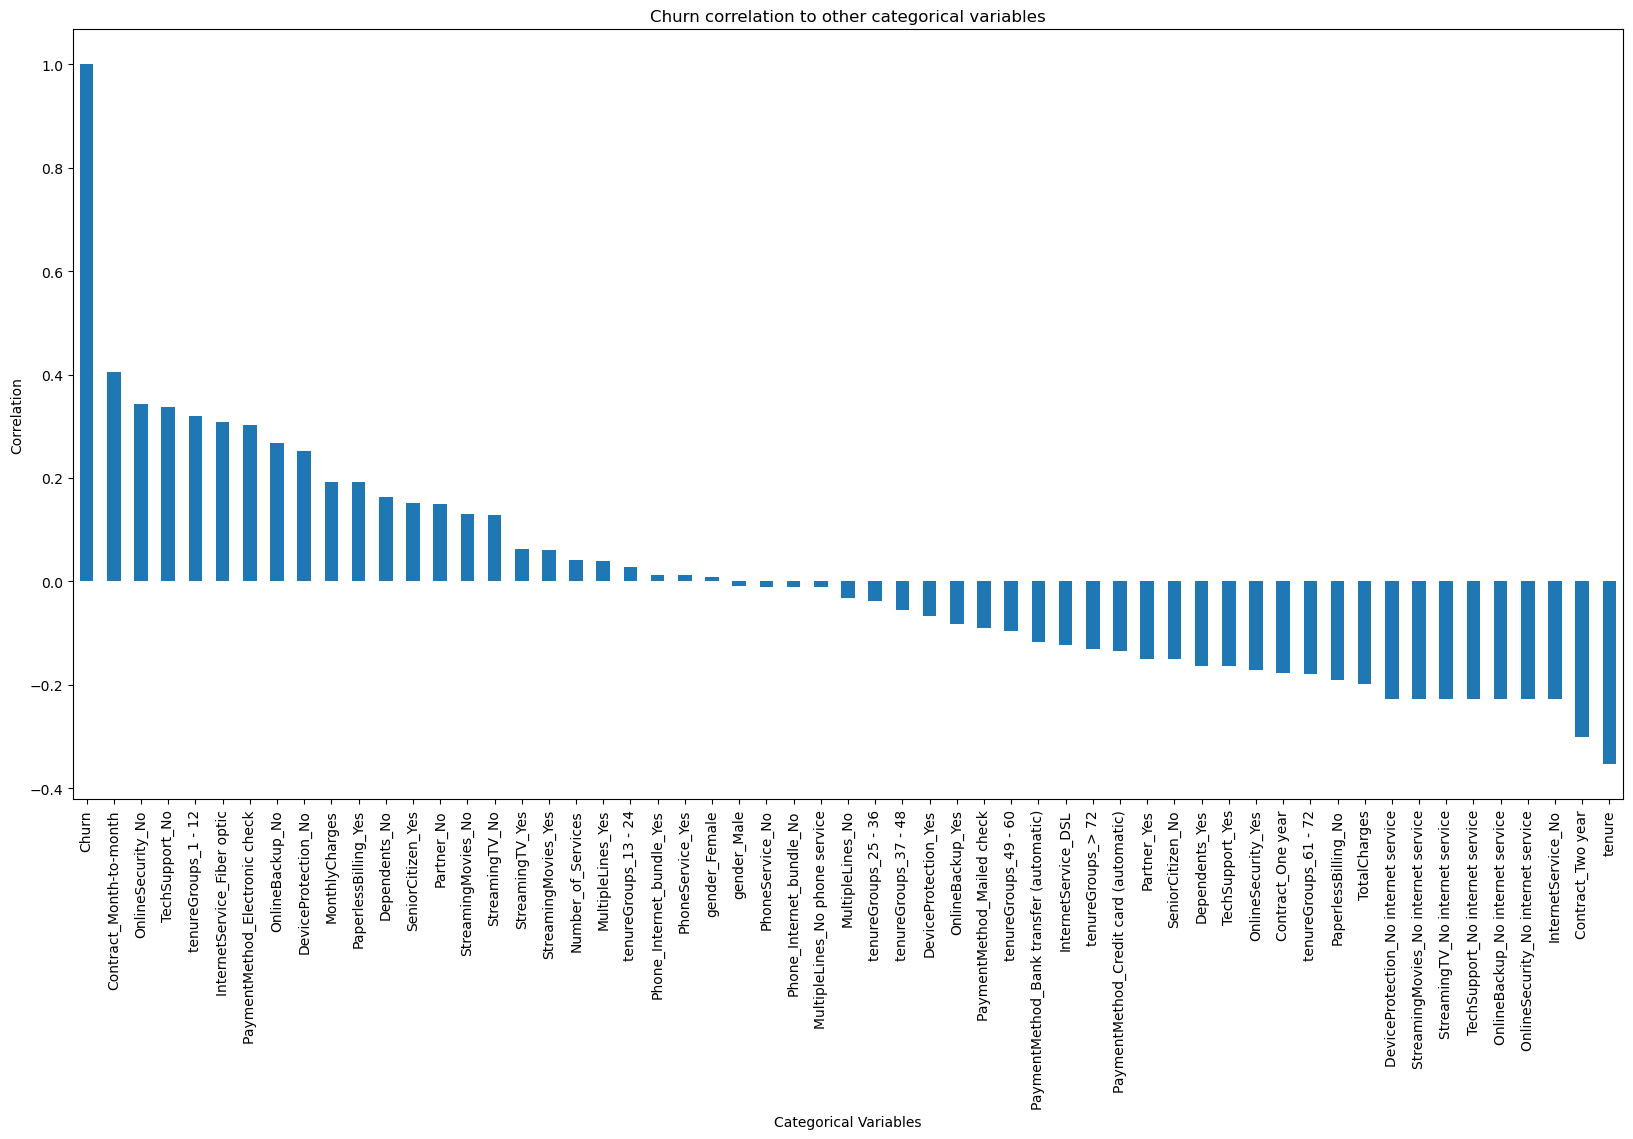

In [19]:
# it's difficult to review the correlation in table form. Will convert to a graphical version comparing only churn to all other categories
plt.figure(figsize=(20,10))
churn_converted_filtered.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Correlation')
plt.xlabel('Categorical Variables')
plt.title('Churn correlation to other categorical variables')
plt.show()

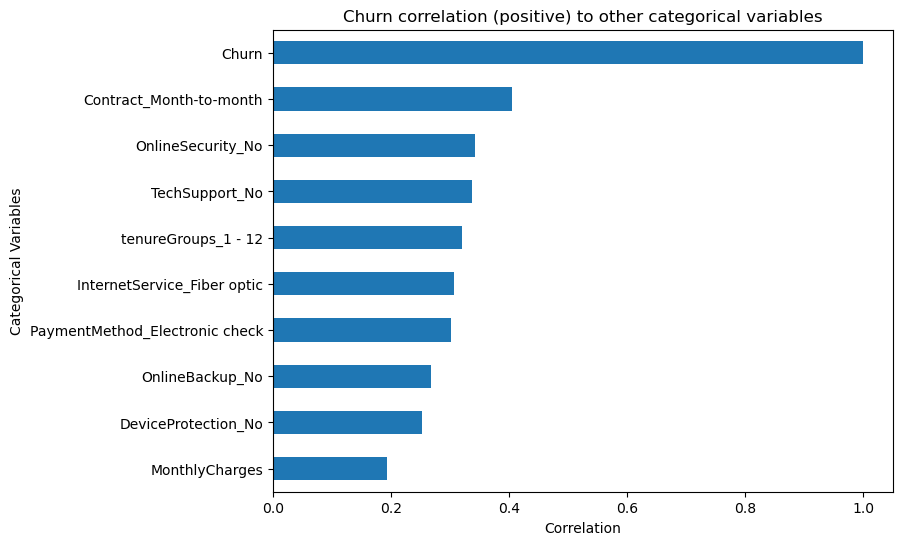

In [20]:
# let's pare the chart down to the list of most highly correlated features
# it's still a bit busy to summarize the correlation results. 
plt.figure(figsize=(8,6))
churn_converted_filtered.corr()['Churn'].sort_values(ascending=True).tail(10).plot(kind='barh')
plt.xlabel('Correlation')
plt.ylabel('Categorical Variables')
plt.title('Churn correlation (positive) to other categorical variables')
plt.show()

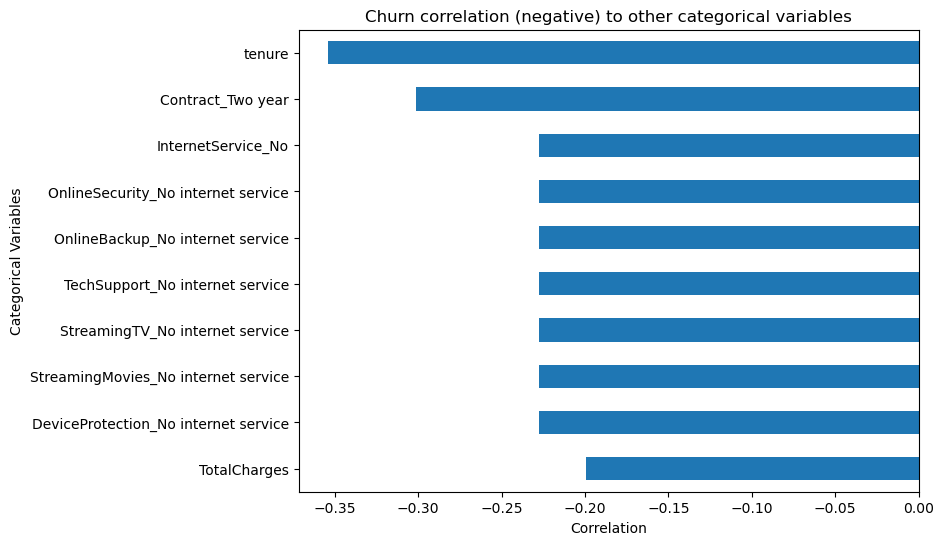

In [21]:
# let's pare the chart down to the list of most highly (negative) correlated features
plt.figure(figsize=(8,6))
churn_converted_filtered.corr()['Churn'].sort_values(ascending=False).tail(10).plot(kind='barh')
plt.xlabel('Correlation')
plt.ylabel('Categorical Variables')
plt.title('Churn correlation (negative) to other categorical variables')
plt.show()

### Additional Insights gained from correlation analysis
This corroborates many of our initial insights on things that increase churn, such as monthly contracts, tenure of 1 to 12 months, paperless billing, payment by electronic check, etc.
However, it also helps to identify the variables with the lower churn values.  
* Tenure has a negative correlation, as tenure increases the potential for churn decreases.  This makes sense given that one of the highest churn categories was customers with 1 year or less tenure.
* The same holds true for those on a 2 year contract vs month to month.  Two year contract customers appear to be less likely to churn. 
* Customers with multiple and anscillary services (online backup, tech support, device protection and security) are less likely to churn.  With the exception of customers with internet services.  It also appears from this first correlation analysis, churn is lower for customers that do not leverage our internet service.  

Next we will look at churned customer population in more detail.

In [22]:
#split churned customers vs active customers
active_cust = churn_df[churn_df['Churn']==0]
churned_cust = churn_df[churn_df['Churn']==1]



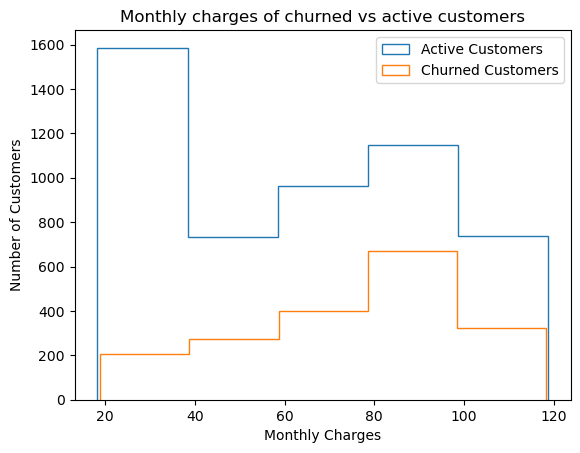

In [23]:
#look at churn vs tenure plot
fig, ax = plt.subplots()
#plot histogram of active customers vs tenure
ax.hist(active_cust['MonthlyCharges'], label="Active Customers", histtype='step', bins=5)
#plot histogram of churned customers vs tenure
ax.hist(churned_cust['MonthlyCharges'], label="Churned Customers", histtype='step', bins=5)
# label axes
ax.set_xlabel("Monthly Charges")
ax.set_ylabel("Number of Customers")
ax.set_title("Monthly charges of churned vs active customers")

ax.legend()
plt.show()

This chart supports earlier correlation data that churn and monthly charges are correlated.  Churn will increase as the monthly charges increase.  Based on this sample, it also shows that significant portion of our customer base is paying less than $40 per month.  And our highest rate of churn is for those customers paying between $80-100 per month.

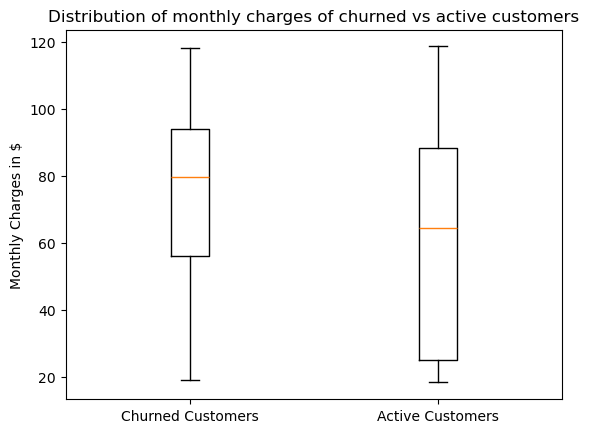

In [24]:
#To review the distribution of monthly charges. I want to create a few box plots.
fig, ax = plt.subplots()
ax.boxplot([churned_cust['MonthlyCharges'], active_cust['MonthlyCharges']])
ax.set_xticklabels(['Churned Customers', 'Active Customers'])
ax.set_ylabel("Monthly Charges in $")
ax.set_title("Distribution of monthly charges of churned vs active customers")
plt.show()

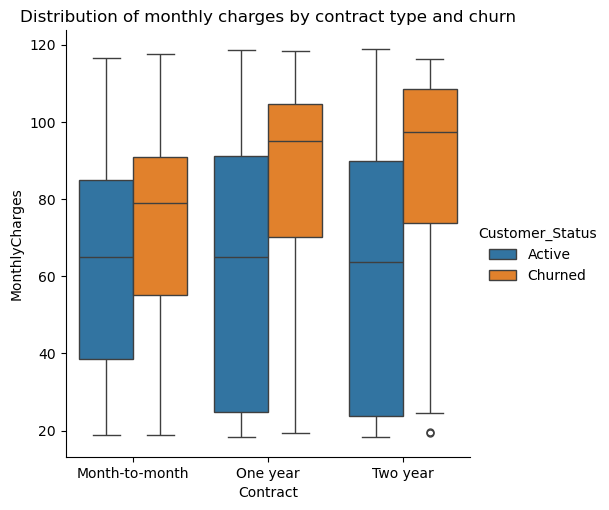

In [25]:
#break down the churn by contract types
sns.catplot(x='Contract', y='MonthlyCharges', data=churn_df, kind='box', hue='Customer_Status')
plt.title("Distribution of monthly charges by contract type and churn")
plt.show()

These box plots demonstrate that the median monthly charges for customers that churn is roughly $80 per month vs ~ $65 for active customers. And if we dig deeper, across all contract types, the customers who churn are paying higher monthly fees than the active customers who do not churn.

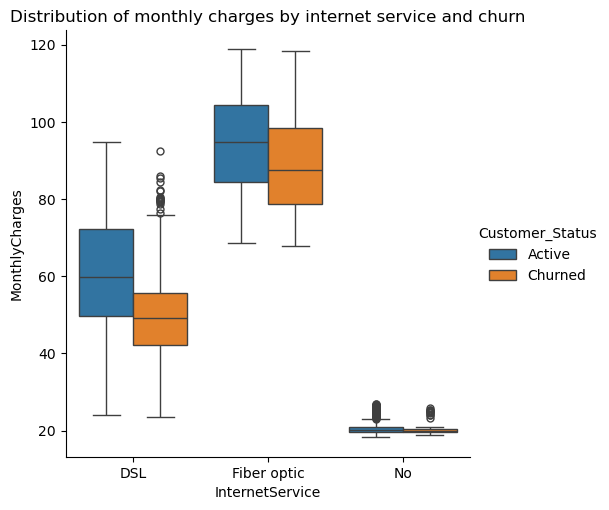

In [26]:
#break down the churn by internet service types
sns.catplot(x='InternetService', y='MonthlyCharges', data=churn_df, kind='box', hue='Customer_Status')
plt.title("Distribution of monthly charges by internet service and churn")
plt.show()

Price appears to be less of an issue for internet customers who churn.  This could be an indicator that the issue is more related to service levels rather than pricing constraints.

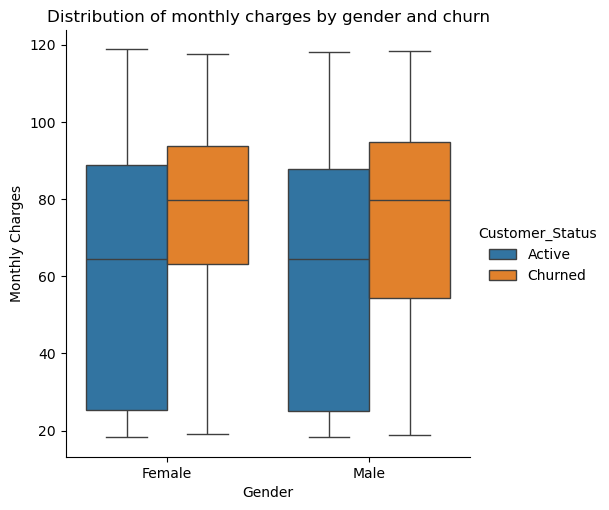

In [27]:
#break down the churn by gender
sns.catplot(x='gender', y='MonthlyCharges', data=churn_df, kind='box', hue='Customer_Status')
plt.title("Distribution of monthly charges by gender and churn")
plt.xlabel('Gender')
plt.ylabel('Monthly Charges')
plt.show()

This is further evidence that gender doesn't seem to impact our churn.

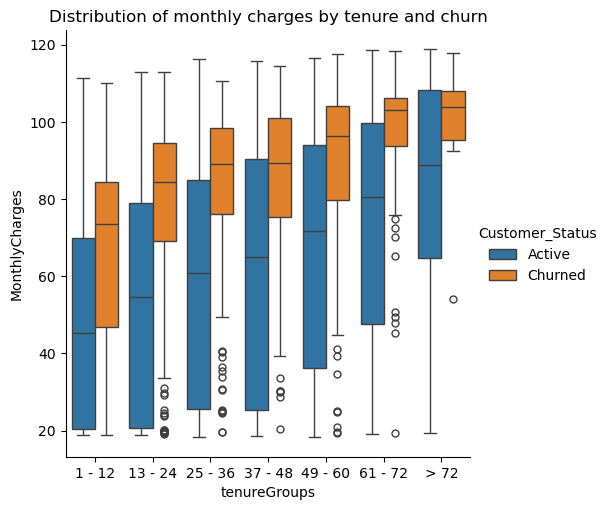

In [28]:
#break down the churn by gender
sns.catplot(x='tenureGroups', y='MonthlyCharges', data=churn_df, kind='box', hue='Customer_Status')
plt.title("Distribution of monthly charges by tenure and churn")
plt.show()

As tenure increases so does the monthly charges amount.  In all cases, the churn customers appear to be paying more.  

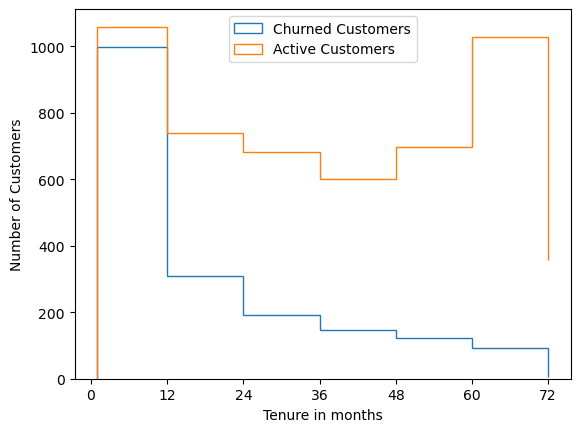

In [29]:
#look at churn vs monthly charges
fig, ax = plt.subplots()
#plot histogram of churned customers vs tenure
ax.hist(churned_cust['tenure'], label="Churned Customers", histtype='step', bins = [1,12,24,36,48,60,72, float('inf')])
#plot histogram of active customers vs tenure
ax.hist(active_cust['tenure'], label="Active Customers", histtype='step', bins = [1,12,24,36,48,60,72, float('inf')])
# label axes
ax.set_xlabel("Tenure in months")
ax.set_ylabel("Number of Customers")
ax.set_xticks([0,12,24,36,48,60,72])
ax.legend()
plt.show()

This is a better visualization for the relationship between tenure and churn.  Our highest churn rate is in the category of customers who have less than 1 year tenure with the company.